# Task 9: House Price Prediction
**Goal:** Build a regression model to predict house prices with R² > 75% and visualize Actual vs Predicted Prices

In [1]:
# Mount Google Drive to access the data file
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
# Load the dataset
# NOTE: Update the path to match your file location in Google Drive
df = pd.read_csv('/content/drive/MyDrive/uybor.csv')

# Display basic information about the dataset
print("Dataset shape:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Dataset shape: (7421, 9)

Column names: ['address', 'district', 'rooms', 'size', 'level', 'max_levels', 'price', 'lat', 'lng']

First 5 rows:


,address,district,rooms,size,level,max_levels,price,lat,lng
0,"город Ташкент, Yunusobod район, Юнусабад 8-й к...",Yunusobod,3,57.0,4,4,52000,41.371471,69.281049
1,"город Ташкент, Yakkasaroy район, 1-й тупик Шот...",Yakkasaroy,2,52.0,4,5,56000,41.291115,69.261104
2,"город Ташкент, Chilonzor район, Чиланзар 2-й к...",Chilonzor,2,42.0,4,4,37000,41.280784,69.223683
3,"город Ташкент, Chilonzor район, Чиланзар 9-й к...",Chilonzor,3,65.0,1,4,49500,41.290163,69.196862
4,"город Ташкент, Chilonzor район, площадь Актепа",Chilonzor,3,70.0,3,5,55000,41.300156,69.210831


In [4]:
# Data preprocessing
# Remove rows where price is missing
df = df.dropna(subset=['price'])

# Fill missing numerical values with median
df.fillna(df.median(numeric_only=True), inplace=True)

print("Dataset shape after cleaning:", df.shape)
print("\nBasic statistics:")
df.describe()

Dataset shape after cleaning: (7421, 9)

Basic statistics:


,rooms,size,level,max_levels,price,lat,lng
count,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000,7421.000000
mean,2.619728,73.150726,3.699367,6.031397,59117.618919,41.303620,69.256615
std,1.076887,36.999670,2.239028,2.607673,46701.090308,0.033771,0.059061
min,1.000000,14.000000,1.000000,1.000000,10500.000000,41.186375,69.148915
25%,2.000000,50.000000,2.000000,4.000000,35000.000000,41.281265,69.205802
50%,3.000000,65.000000,3.000000,5.000000,46500.000000,41.296388,69.260189
75%,3.000000,85.000000,5.000000,9.000000,66847.000000,41.324956,69.293713
max,10.000000,456.000000,19.000000,25.000000,800000.000000,41.424522,69.588687


In [5]:
# Prepare features and target variable
X = df.drop(columns=['price', 'address'])
y = df['price']

# Define categorical and numerical features
categorical_features = ['district']
numerical_features = ['rooms', 'size', 'level', 'max_levels', 'lat', 'lng']

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (7421, 7)
Target shape: (7421,)


In [6]:
# Create preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
        ('num', 'passthrough', numerical_features)
    ]
)

# Create the model pipeline with RandomForestRegressor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(
        n_estimators=200,
        random_state=42,
        n_jobs=-1
    ))
])

In [7]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))

Training set size: 5936
Test set size: 1485


In [8]:
# Train the model
print("Training the model...")
model.fit(X_train, y_train)
print("Model training completed!")

Training the model...
Model training completed!


In [9]:
# Make predictions on test set
y_pred = model.predict(X_test)

# Calculate R² score and other metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print("=" * 50)
print("MODEL EVALUATION RESULTS")
print("=" * 50)
print(f"R² Score: {r2:.4f} ({r2*100:.2f}%)")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print("=" * 50)

if r2 > 0.75:
    print("✓ R² is greater than 75%! Task requirement met.")
else:
    print("✗ R² is less than 75%. Model needs improvement.")

MODEL EVALUATION RESULTS
R² Score: 0.7870 (78.70%)
RMSE: 19790.11
MAE: 9362.27
✓ R² is greater than 75%! Task requirement met.


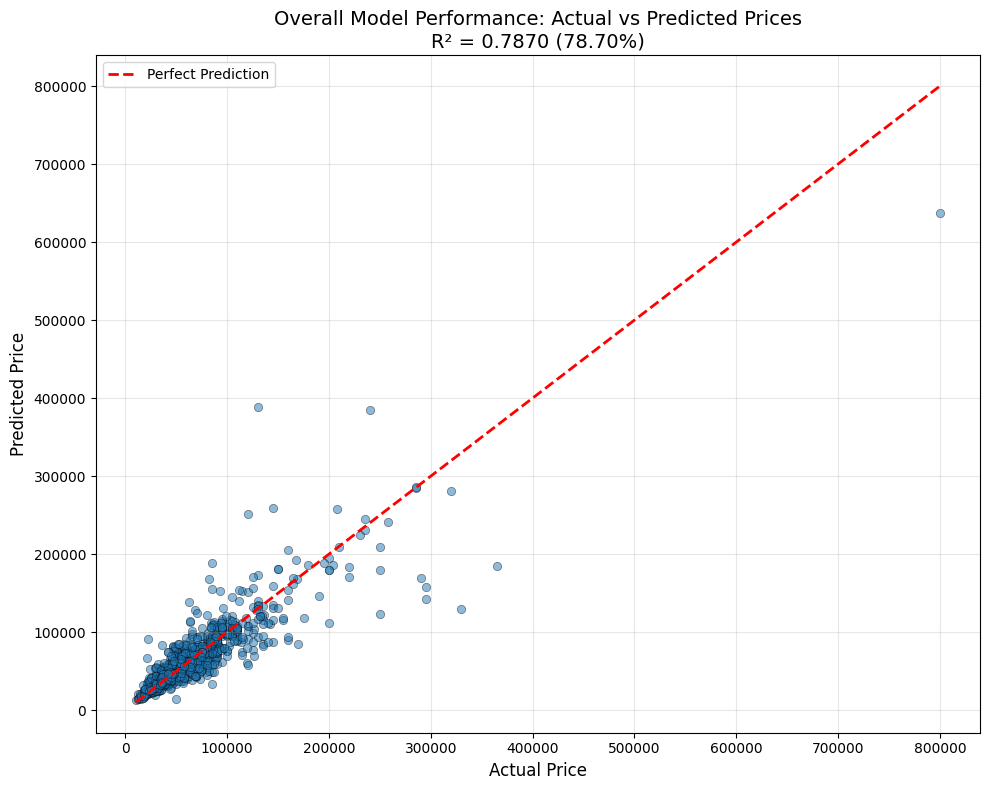

In [10]:
# Create visualization: Actual vs Predicted Prices
plt.figure(figsize=(10, 8))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k', linewidths=0.5)

# Add perfect prediction line (diagonal)
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2, label='Perfect Prediction')

# Labels and title
plt.xlabel('Actual Price', fontsize=12)
plt.ylabel('Predicted Price', fontsize=12)
plt.title(f'Overall Model Performance: Actual vs Predicted Prices\nR² = {r2:.4f} ({r2*100:.2f}%)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()